In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

plt.style.use("seaborn-dark")
np.random.seed(42)

In [2]:
ocean = pd.read_csv('C:/Users/Owner/atlantic.csv').drop(['ID', 'Name'], axis=1)
ocean.head()

,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,18510625,0,,HU,28.0N,94.8W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,18510625,600,,HU,28.0N,95.4W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,18510625,1200,,HU,28.0N,96.0W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,18510625,1800,,HU,28.1N,96.5W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,18510625,2100,L,HU,28.2N,96.8W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [3]:
ocean.columns

Index(['Date', 'Time', 'Event', 'Status', 'Latitude', 'Longitude',
       'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE',
       'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW'],
      dtype='object')

In [4]:
ocean.Status.unique() #returns unique entries of the column status

array([' HU', ' TS', ' EX', ' TD', ' LO', ' DB', ' SD', ' SS', ' WV'],
      dtype=object)

' Explaination Status of cyclone\n\nWV - Tropical Wave\nTD - Tropical Depression\nTS - Tropical Storm\nHU - Hurricane\nEX - Extratropical cyclone\nSD - Subtropical depression (winds <34 kt)\nSS - Subtropical storm (winds >34 kt)\nLO - A low pressure system not fitting any of above descriptions\nDB - non-tropical Disturbance not have a closed circulation\n\n(Hurricane Research Division, 2022) '

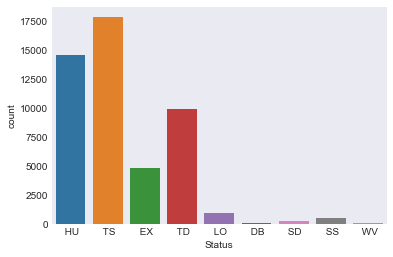

In [5]:
sns.countplot(x="Status", data=ocean)
#print(ocean.Status.value_counts()) #prints the status count

""" Explaination Status of cyclone

WV - Tropical Wave
TD - Tropical Depression
TS - Tropical Storm
HU - Hurricane
EX - Extratropical cyclone
SD - Subtropical depression (winds <34 kt)
SS - Subtropical storm (winds >34 kt)
LO - A low pressure system not fitting any of above descriptions
DB - non-tropical Disturbance not have a closed circulation

(Hurricane Research Division, 2022) """

In [6]:
ocean.loc[:,'Status'] = ocean['Status'].str.strip() #loc is label-based, which means that we have to specify the name of the rows and columns that we need to filter out.
ocean.Event.unique()

array(['  ', ' L', ' R', ' I', ' P', ' W', ' C', ' S', ' G', ' T'],
      dtype=object)

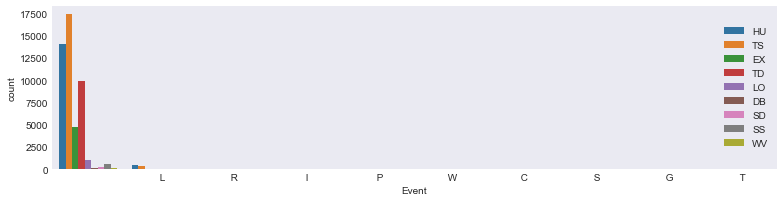

In [7]:
plt.figure(figsize=(13,3))
sns.countplot(ocean.Event,hue=ocean.Status)
plt.legend(loc='right')

In [8]:
#ocean.Time.unique()

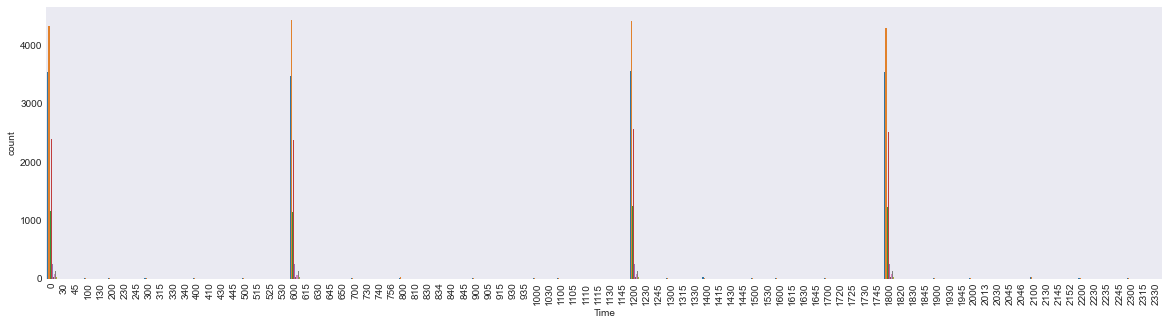

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(ocean.Time, hue=ocean.Status)
plt.legend('')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Status', ylabel='Time'>

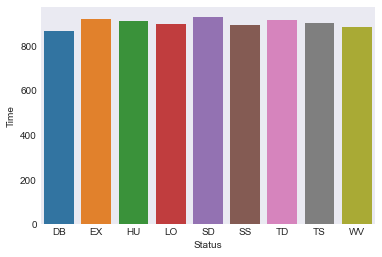

In [10]:
b = ocean.groupby(by='Status')['Time'].mean()
sns.barplot(x=b.index, y=b)

In [11]:
occasion = pd.to_datetime(ocean['Date'], format='%Y%m%d')
ocean['Year'] = pd.DatetimeIndex(occasion).year
ocean['Month'] = pd.DatetimeIndex(occasion).month
ocean['Day'] = pd.DatetimeIndex(occasion).day

<Figure size 432x288 with 0 Axes>

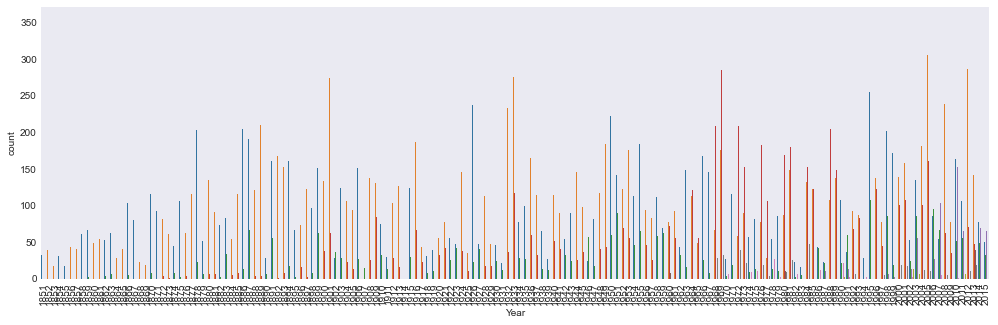

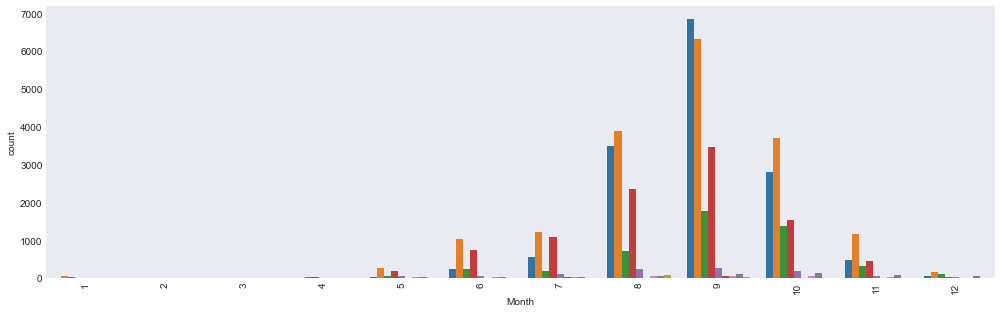

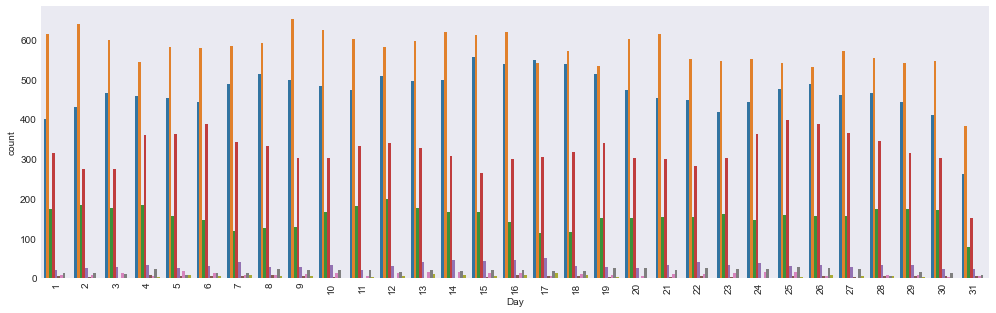

In [12]:
columns = ['Year', 'Month', 'Day']
for i, columns in enumerate(columns):
    plt.figure(i)
    plt.figure(figsize=(17,5))
    sns.countplot(x=columns, hue='Status', data=ocean)
    plt.legend('')
    plt.xticks(rotation=90)

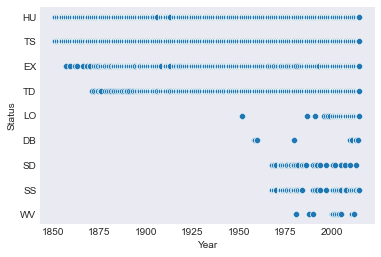

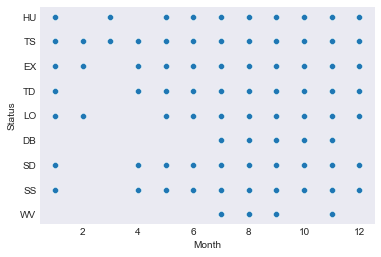

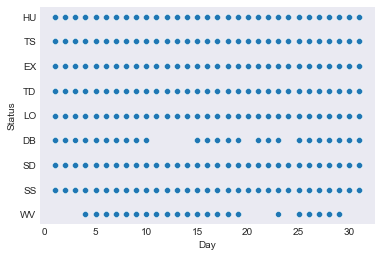

In [13]:
columns = ['Year', 'Month', 'Day']
for i, columns in enumerate(columns):
    plt.figure(i)
    sns.scatterplot(ocean[columns], ocean['Status'])

In [14]:
a = ocean['Latitude'].unique()[0]
str(a).replace('N', '')

'28.0'

In [15]:
directions =['N', 'S', 'E', 'W']
for dir_ in directions:
    ocean.loc[:,'Latitude'] = ocean['Latitude'].apply(lambda x : str(x).replace(dir_,''))
    ocean.loc[:,'Longitude'] = ocean['Longitude'].apply(lambda x : str(x).replace(dir_,''))

<AxesSubplot:xlabel='Latitude', ylabel='Density'>

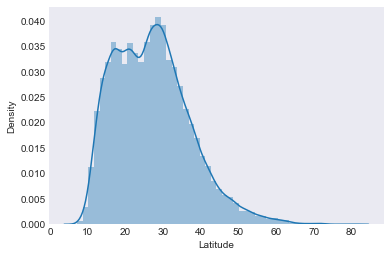

In [16]:
sns.distplot(ocean['Latitude'].astype('float'))

<AxesSubplot:xlabel='Longitude', ylabel='Density'>

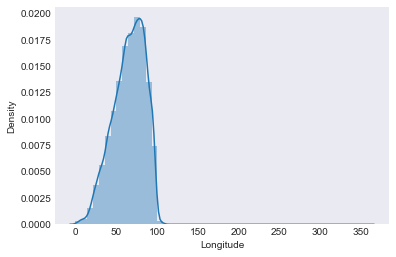

In [17]:
sns.distplot(ocean['Longitude'].astype('float'))

<AxesSubplot:xlabel='Maximum Wind', ylabel='Density'>

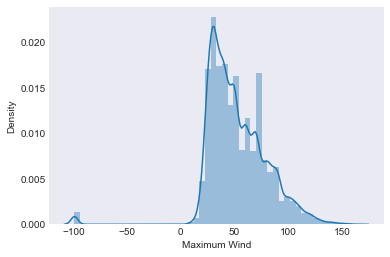

In [18]:
sns.distplot(ocean['Maximum Wind'])

In [19]:
features = ['Time', 'Status', 'Latitude', 'Longitude',
       'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE',
       'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW', 'Year', 'Month', 'Day']

label = 'Status'

In [20]:
from sklearn.preprocessing import LabelEncoder

y = ocean['Status']

le = LabelEncoder()
le.fit(y)
ocean.loc[:,'Status'] = le.transform(y)
print(le.classes_)

['DB' 'EX' 'HU' 'LO' 'SD' 'SS' 'TD' 'TS' 'WV']


In [21]:
X = ocean[features]
y = ocean[label]

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.75)
pca.fit(X)
print("---Variance Ratio---")
print(pca.explained_variance_ratio_.sum()*100)
X_pca = pca.transform(X)

---Variance Ratio---
79.78470817615649


In [24]:
X_pca.shape

(49105, 4)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,stratify = y,test_size = 0.20)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=30000).fit(X_train, y_train)

cv_model = model

from sklearn.model_selection import cross_val_score
score = cross_val_score(cv_model, X_train, y_train, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.94 (+/- 0.02)


In [27]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

cv_model = clf

from sklearn.model_selection import cross_val_score
score = cross_val_score(cv_model, X_train, y_train, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [28]:
clf.fit(X_train, y_train)

GaussianNB()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(CM)

from sklearn.metrics import classification_report
print("----Classification Report----")
print(classification_report(y_test, y_pred))

[[  21    0    0    0    0    0    0    0    0]
 [   0  960    0    0    0    0    0    0    0]
 [   0    0 2907    0    0    0    0    0    0]
 [   0    0    0  201    0    0    0    0    0]
 [   0    0    0    0   59    0    0    0    0]
 [   0    0    0    0    0  111    0    0    0]
 [   0    0    0    0    0    0 1978    0    0]
 [   0    0    0    0    0    0    0 3561    0]
 [   0    0    0    0    0    0    0    0   23]]
----Classification Report----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       960
           2       1.00      1.00      1.00      2907
           3       1.00      1.00      1.00       201
           4       1.00      1.00      1.00        59
           5       1.00      1.00      1.00       111
           6       1.00      1.00      1.00      1978
           7       1.00      1.00      1.00      3561
           8       1.00      1.00      1.00       